# Итоговый проект: Телекоммуникации

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Основная задача — обучить на этих данных модель для прогноза оттока клиентов.<br/><br/>
Оператор связи предоставляет два основных типа услуг:

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны дополнительные услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity)
Выделенная линия технической поддержки (TechSupport)
Облачное хранилище файлов для резервного копирования данных (OnlineBackup)
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies)
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Суть исследования:** на основе четырех имеющихся данных о клиентах компании, предсказать возможный уход клиента и разрыв договора с ним, опираясь на информацию о человеке либо о типе его подписки.<br/><br/>
**Задачи исследования:** обучить различные модели, проверить качество их работы на тренировочной выборке, и постараться усовершенствовать их на сколько возможно, добавляя или изменяя входные данные, либо же подбирая и меняя гиперпараметры моделей. <br/><br/>
**Исходные данные:** данные состоят из четырех датасетов, полученных из разных структурных подразделений оператора связи: <br/>

*contract.csv* – информация о договоре <br/>
*personal.csv* – персональные данные клиента <br/>
*internet.csv* – информация об интернет-услугах <br/>
*phone.csv* – информация об услугах телефонии <br/>

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 г. <br/>

**Данное исследование будет идти по такому плану:**<br/>
* предобработка данных
* исследовательский анализ данных
* корреляционный анализ всех признаков
* написание пайплайнов для подбора гиперпараметров и выявления лучшей модели
* предсказание на тестовой выборке с помощью лучшей из моделей
* создание матрицы ошибок на основе полученных предсказаний
* общие выводы из работы и рекомендации

**Цель проекта:** разработать модель машинного обучения, прогнозирующую возможный отток клиентов.

**Целевое ограничение, по которому оценивается результат выполнения проекта:** значение метрики ROC_AUC лучшей модели на тестовой выборке должно быть >= 0.85. <br/>

**Целевой признак:** - столбец EndDate <br/>

Решаемая в рамках проекта задача относится к задачам классификации.

In [1]:
!pip install phik -q

In [2]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.3.2
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 0.24.1
Uninstalling scikit-learn-0.24.1:
  Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 10.9 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 72.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
1.3.2


In [3]:
import sklearn
print("Sklearn version:", sklearn.__version__)
print("Sklearn location:", sklearn.__file__)
!which pip

Sklearn version: 1.3.2
Sklearn location: /opt/conda/lib/python3.9/site-packages/sklearn/__init__.py
/opt/conda/bin/pip


In [4]:
import pandas as pd
import warnings
warnings.simplefilter("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import sklearn
import phik

from functools import reduce
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import (SelectKBest,
                                       chi2)

In [5]:
from datetime import datetime, date, time

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder

import datetime

from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (RandomForestClassifier,VotingClassifier)
from xgboost import XGBClassifier
from catboost import (CatBoostClassifier,
                      Pool,
                      cv as cross_validate)
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

In [7]:
RANDOM_STATE = 300924
TEST_SIZE = 0.25

## Загрузка данных

In [8]:
#создадим 4 датасета и загрузим в них исходные датафремы
contract = pd.read_csv('/datasets/contract_new.csv', sep=',')
personal = pd.read_csv('/datasets/personal_new.csv', sep=',')
internet = pd.read_csv('/datasets/internet_new.csv', sep=',')
phone = pd.read_csv('/datasets/phone_new.csv', sep=',')

In [9]:
#выведем несколько строк и посмотрим какие данные в них содержатся, а также выведем информацию о датафрейме
display(contract.head(6))
print(contract.info())
print()
display(personal.head(6))
print(personal.info())
print()
display(internet.head(6))
print(internet.info())
display(phone.head(6))
print(phone.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


Мы посмотрели по несколько строчек из каждого датафрейма, вывели и изучили общую информацию по каждому из них. Исходя из этого можно сделать следующие выводы: 
* в данных отсутствует столбец с целевым признаком
* даты записаны в формате object
* булевые переменные обозначены словами
* пропусков в данных нет
* некоторые числа записаны типом object

## Шаг. Исследовательский анализ и предобработка данных

Прежде чем сделать исследовательский анализ данных во всех датафреймах, изменим тип данных на более нужные и проверим данные на наличие дубликатов.

In [10]:
# Замена некорректных значений и преобразование типов
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

Создадим целевой признак

In [11]:
#столбец EndDate переведем в булевый тип, если no будет 0, а если дата есть то будет 1.
#contract['target'] = contract['EndDate'].map(lambda x: 0 if x == 'No' else 1).astype('int64')
contract['target'] = [1 if i != 'No' else 0 for i in contract['EndDate']]

In [12]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.20,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.40,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.60,0
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.80,0


Выведем все уникальные значения в столбце EndDate.

In [13]:
unique_values = contract['EndDate'].unique()
print(unique_values)

['No' '2017-05-01' '2016-03-01' '2018-09-01' '2018-11-01' '2018-12-01'
 '2019-08-01' '2018-07-01' '2017-09-01' '2015-09-01' '2016-07-01'
 '2016-06-01' '2018-03-01' '2019-02-01' '2018-06-01' '2019-06-01'
 '2020-01-01' '2019-11-01' '2016-09-01' '2015-06-01' '2016-12-01'
 '2019-05-01' '2019-04-01' '2017-06-01' '2017-08-01' '2018-04-01'
 '2018-08-01' '2018-02-01' '2019-07-01' '2015-12-01' '2014-06-01'
 '2018-10-01' '2019-01-01' '2017-07-01' '2017-12-01' '2018-05-01'
 '2015-11-01' '2019-10-01' '2019-03-01' '2016-02-01' '2016-10-01'
 '2018-01-01' '2017-11-01' '2015-10-01' '2019-12-01' '2015-07-01'
 '2017-04-01' '2015-02-01' '2017-03-01' '2016-05-01' '2016-11-01'
 '2015-08-01' '2019-09-01' '2017-10-01' '2017-02-01' '2016-08-01'
 '2016-04-01' '2015-05-01' '2014-09-01' '2014-10-01' '2017-01-01'
 '2015-03-01' '2015-01-01' '2016-01-01' '2015-04-01' '2014-12-01'
 '2014-11-01']


Одно значение выделяется -  No. Его заменим на дату, когда были представлены данные - 1 февраля 2020 года.

In [14]:
contract.loc[(contract['EndDate'] == 'No'),'EndDate'] = '2020-02-01'

In [15]:
#изменим тип данных в столбце EndDate на datetime
contract['EndDate'] = pd.to_datetime(contract['EndDate'],format= "%Y/%m/%d")

Теперь данные приведены к подходящим типам. <br/>
Проверим датасеты на наличие дубликатов.

In [16]:
print(contract.duplicated().sum())
print(personal.duplicated().sum())
print(internet.duplicated().sum())
phone.duplicated().sum()

0
0
0


0

In [17]:
#выведем информацию по уникальным наименованиям текстовых столбцов во всех датафреймах чтобы проверить названия на опечатки
unique_values = contract['Type'].unique()
print(unique_values)
unique_values = contract['PaymentMethod'].unique()
print(unique_values)
unique_values = personal['gender'].unique()
print(unique_values)
unique_values = internet['InternetService'].unique()
print(unique_values)


['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Female' 'Male']
['DSL' 'Fiber optic']


In [19]:
display(contract.head(6))
print(contract.info())
print()
display(personal.head(6))
print(personal.info())
print()
display(internet.head(6))
print(internet.info())
display(phone.head(6))
print(phone.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   target            7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB
None



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


Опечатки не выявлены. Идем дальше. <br/>
В итоге датафрецмы обработаны, названия соответствуют стандарту, типы соответствуют содержимому, пропусков и дубликатов нет. <br/><br/>
Приступаем к исследовательскому анализу.

In [20]:
contract.loc[:, ['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2118.621822
std,30.090047,2112.736199
min,18.250000,19.050000
25%,35.500000,439.745000
50%,70.350000,1345.275000
75%,89.850000,3239.317500
max,118.750000,9221.380000


Проанализируем полученные данные. <br/>
Данные сильно разнятся, но это информация по тратам клиентов, поэтому логично что она может быть разной. Явных аномалий не замечено.

Обьединим все датафреймы для более удобной дальнейшней работы 

In [21]:
names = [contract, internet, personal, phone]
data = reduce(lambda  left,right: pd.merge(left ,right, on=['customerID'],
                                            how='outer'), names)
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,DSL,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,DSL,...,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Fiber optic,...,No,No,No,No,No,Female,0,No,No,No


Проверим количество пропусков

In [22]:
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
target                 0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

В некоторых столбцах довольно много пропусков. Их одинаковое количество и связано это с тем что об этих пользователях не было никакой информации в датафрейме Internet. Скорее всего они просто не подключили данную услугу совсем. А пропуски в столбце MyltiplieLines говорят что пользователь не пользовался услугами телефона. Заменим пропуски на фразы no_internet и no_phone.

In [23]:
data['MultipleLines'].fillna('no_phone', inplace = True)


Стоит заметить что в столбце TotalCharges имеется 11 пропусков. О платеже нет информации. Выведем эти строки

In [24]:
data[data['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,DSL,...,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,no_phone
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,DSL,...,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,no_phone
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


Заметим, что все данные за одно число - последнее, на которое у нас имеются данные. Можно сделать вывод что данные абоненты еще просто не успели оплатить, так как заключили договор в день сбора данных. Заполним пропуски ежемесячным платежом.

In [25]:
data['TotalCharges'].fillna(data[data['TotalCharges'].isnull()]['MonthlyCharges'],
                                          inplace = True)

Все оставшиеся пропуски заполним фразой no_internet

In [26]:
data.fillna('no_internet', inplace = True)

Создадим новый столбец period с количеством дней которые пользователь пользуется(или пользовался) подпиской. 

In [27]:
#теперь расчитаем сколько прошло дней пока человек не расторг договор(либо до последней возможной даты)
data['period']=(data['EndDate']-data['BeginDate'])/np.timedelta64(1,'D')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   object        
 11  OnlineBackup      7043 non-null   object        
 12  DeviceProtection  7043 non-null   object        
 13  TechSupport       7043 non-null   object        
 14  StreamingTV       7043 n

Мы получили большую итоговую таблицу со всеми данными без единого пропуска!<br/>
Визуализируем категориальные и численные столбцы.

Гистаграммы для всех числовых переменных:



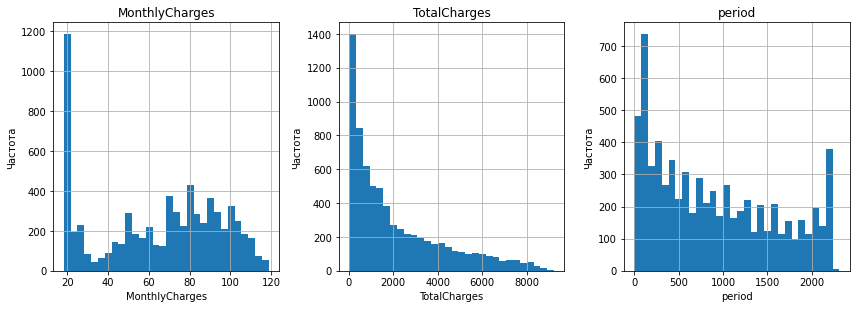

In [29]:
#выведем гистограммы снова
print('Гистаграммы для всех числовых переменных:\n')

# Найдем числовые столбцы в датафрейме
numerical_columns = ['MonthlyCharges', 'TotalCharges','period']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(12, 8))

# Цикл для итерации по каждому числовому столбцу
for i, column in enumerate(numerical_columns):
    # Создаем subplot для текущего столбца
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
    data[column].hist(bins=30)
    
    # Добавляем заголовок с названием столбца
    plt.title(column)
    
    # Добавляем метки для осей
    plt.xlabel(column)
    plt.ylabel('Частота')

# Отображаем все гистограммы
plt.tight_layout()
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   object        
 11  OnlineBackup      7043 non-null   object        
 12  DeviceProtection  7043 non-null   object        
 13  TechSupport       7043 non-null   object        
 14  StreamingTV       7043 n

In [31]:
#столбец EndDate переведем в булевый тип, если no будет 0, а если дата есть то будет 1.
data['EndDate'] = data['EndDate'].map(lambda x: 0 if x == 'No' else 1).astype('int64')

In [32]:
data['target'].value_counts()

0    5942
1    1101
Name: target, dtype: int64

Круговые диаграммы для всех категориальных переменных:



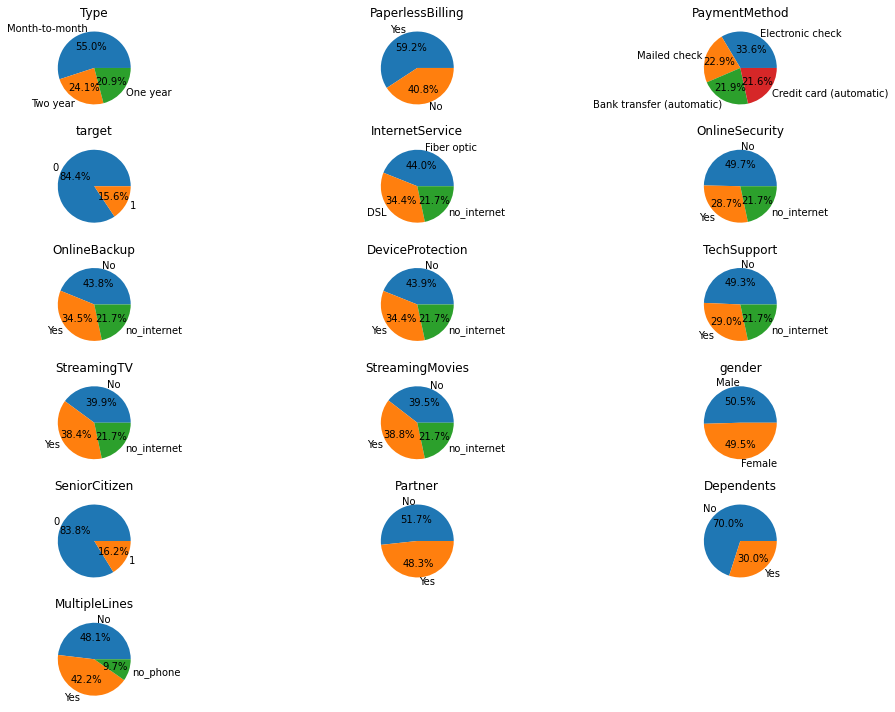

In [33]:
print('Круговые диаграммы для всех категориальных переменных:\n')
# Список столбцов, для которых нужно вывести круговые диаграммы


categorical_columns = [col for col in data.columns if col not in numerical_columns and col != 'BeginDate' and col != 'customerID' and col != 'EndDate']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(14, 10))

# Цикл для итерации по каждому столбцу
for i, column in enumerate(categorical_columns):
    # Создаем subplot для текущего столбца
    plt.subplot(6, 3, i + 1)  # 3 строки, 2 столбца, текущий график
    
    # Подсчитываем количество каждого уникального значения в текущем столбце
    column_data = data[column].value_counts()
    
    # Строим круговую диаграмму для текущего столбца
    plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%')
    
    # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы
plt.tight_layout()
plt.show()

Мы получили визуализацию всех признаков. На первый взгляд ничего особо сказать нельзя. Хочется отметить что в данных не замечены сильные аномалии и выбросы, а также признаки в большинстве распределены довольно равномерно. Особо отличился только целевой признак - только 15% пользователей расторгли договор. 

## Корреляционный анализ.
#### Проведем корреляционный анализ всех признаков в датасете и отберем те, которые влияют на целевую переменную 

In [34]:
#а так же для анализа уберем из датафрейма id
data = data.drop(columns=['customerID','BeginDate','EndDate'])

In [35]:
phik_overview = data.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'target', 'SeniorCitizen', 'period']


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,period
Type,1.00,0.11,0.28,0.39,0.47,0.09,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.00,0.09,0.18,0.15,0.24,0.63
PaperlessBilling,0.11,1.00,0.37,0.47,0.20,0.08,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.00,0.24,0.01,0.17,0.10,0.03
PaymentMethod,0.28,0.37,1.00,0.40,0.34,0.21,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.00,0.29,0.24,0.22,0.17,0.35
MonthlyCharges,0.39,0.47,0.40,1.00,0.71,0.23,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.01,0.30,0.20,0.18,0.71,0.39
TotalCharges,0.47,0.20,0.34,0.71,1.00,0.30,0.49,0.52,0.55,0.56,0.53,0.56,0.55,0.00,0.14,0.38,0.08,0.47,0.85
target,0.09,0.08,0.21,0.23,0.30,1.00,0.06,0.06,0.09,0.09,0.05,0.08,0.09,0.01,0.09,0.23,0.05,0.11,0.37
InternetService,0.51,0.23,0.32,0.92,0.49,0.06,1.00,0.95,0.94,0.94,0.95,0.95,0.95,0.00,0.16,0.00,0.11,0.74,0.06
OnlineSecurity,0.64,0.21,0.32,0.81,0.52,0.06,0.95,1.00,0.95,0.95,0.95,0.94,0.94,0.00,0.13,0.09,0.12,0.54,0.35
OnlineBackup,0.58,0.20,0.29,0.82,0.55,0.09,0.94,0.95,1.00,0.95,0.95,0.95,0.95,0.00,0.11,0.09,0.10,0.56,0.37
DeviceProtection,0.63,0.20,0.30,0.83,0.56,0.09,0.94,0.95,0.95,1.00,0.95,0.95,0.95,0.00,0.11,0.10,0.09,0.56,0.37


In [36]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'period']

phik_overview = data.phik_matrix(interval_cols = interval_cols)

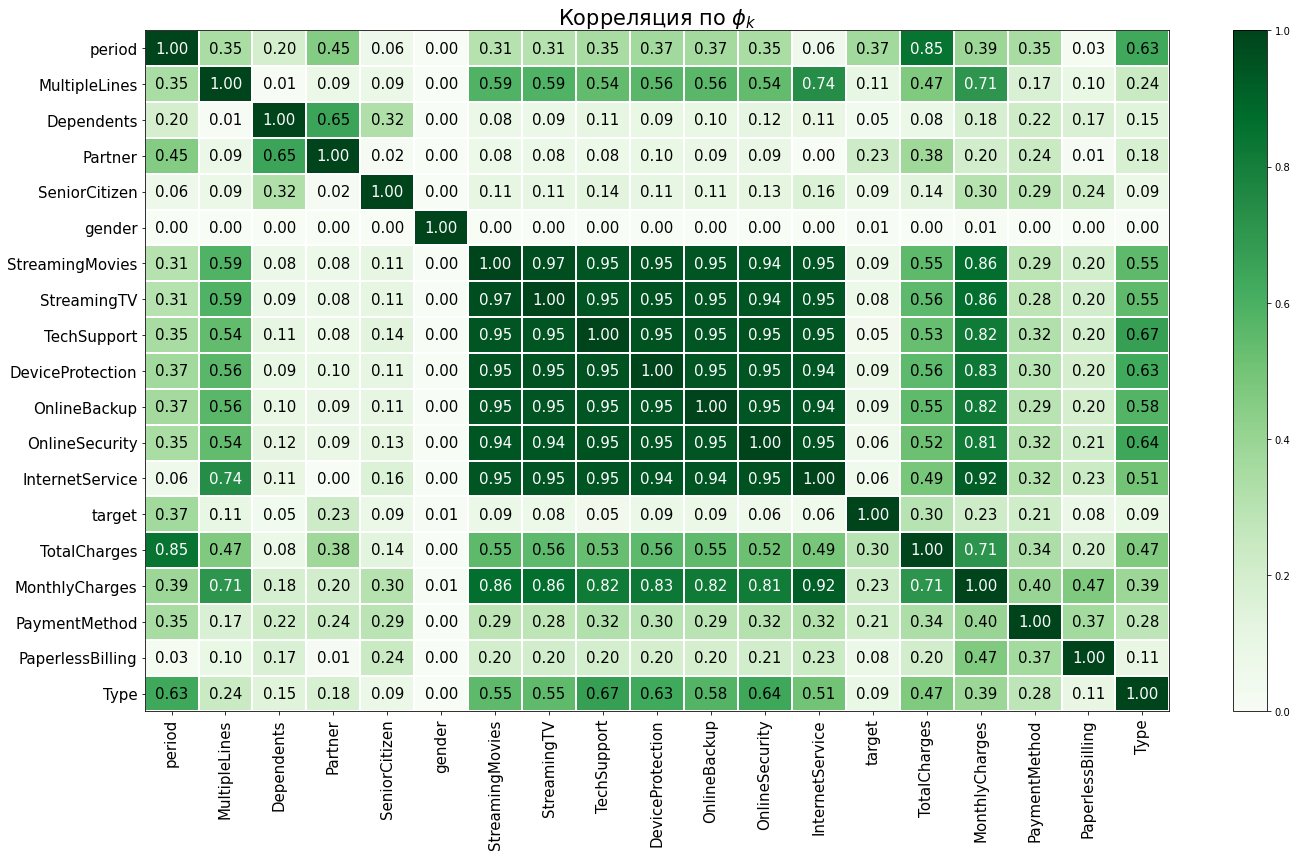

In [37]:
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       title = r'Корреляция по $\phi_k$',
                       color_map= "Greens",
                       fontsize_factor = 1.5,
                       figsize = (20, 12))
plt.show();

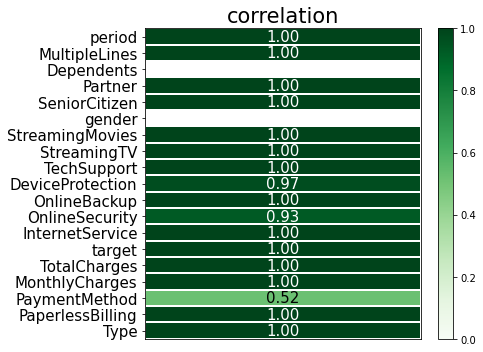

In [38]:
global_correlation, global_labels = data.global_phik(interval_cols = interval_cols)
plot_correlation_matrix(global_correlation,
                       x_labels = [''],
                       y_labels = global_labels,
                       vmin = 0, 
                       vmax = 1,
                       color_map= "Greens",
                       fontsize_factor = 1.5)
plt.tight_layout()
plt.show();

Наглядно: матрица корреляции всех признаков с целевым - EndDate. В датафрейм для обучения модели отберем только те, в которых корреляция больше 0.1

In [39]:
data1 = data.drop(columns=['Dependents','SeniorCitizen','gender','PaperlessBilling','TechSupport','InternetService'])
#data = data[['MultipleLines', 'Partner', 'TotalCharges', 'MonthlyCharges', 'PaymentMethod','EndDate']]
data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,period
0,Month-to-month,Yes,Electronic check,29.85,31.04,0,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,no_phone,31.0
1,One year,No,Mailed check,56.95,2071.84,0,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,1036.0
2,Month-to-month,Yes,Mailed check,53.85,226.17,0,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,123.0
3,One year,No,Bank transfer (automatic),42.30,1960.60,0,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,no_phone,1371.0
4,Month-to-month,Yes,Electronic check,70.70,353.50,0,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,153.0


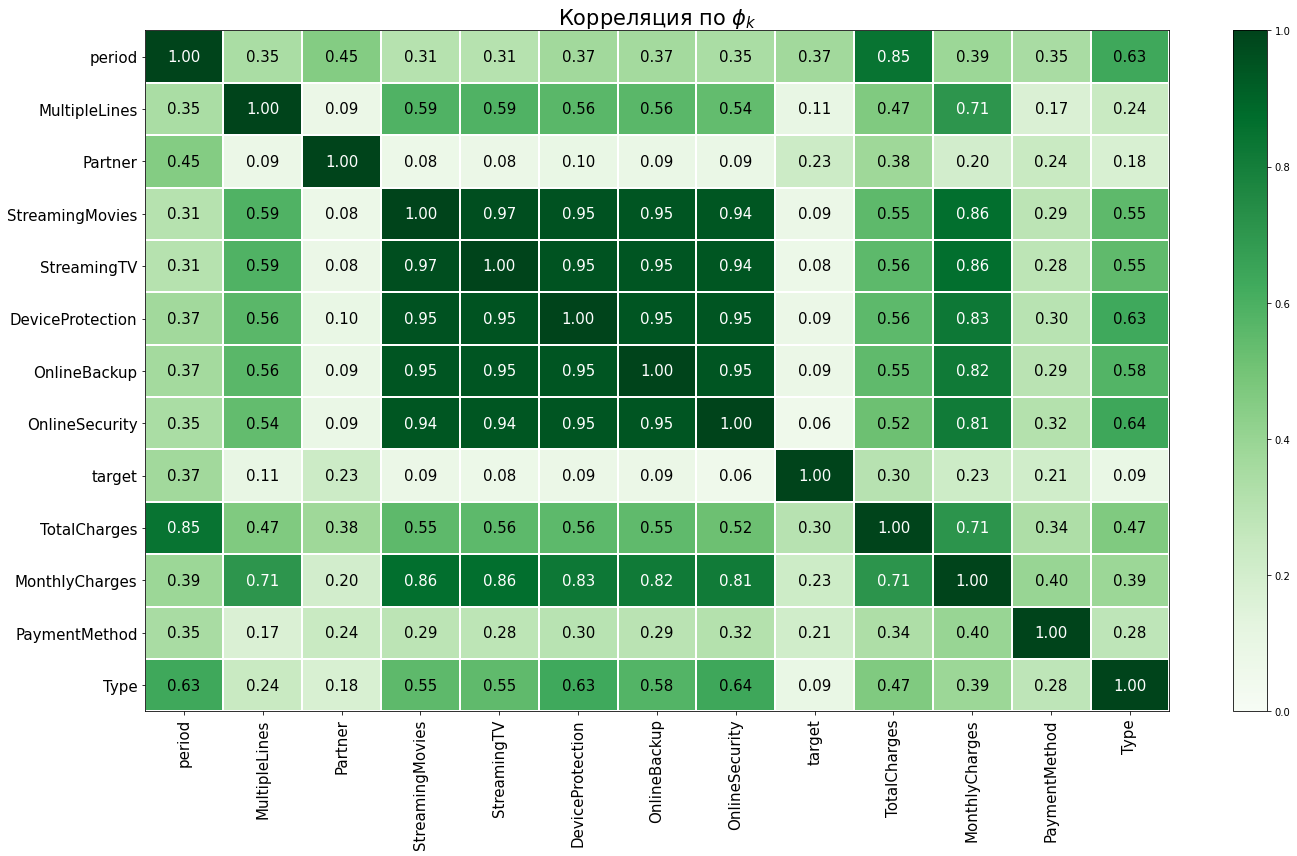

In [40]:
phik_overview = data1.phik_matrix(interval_cols = interval_cols)
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       title = r'Корреляция по $\phi_k$',
                       color_map= "Greens",
                       fontsize_factor = 1.5,
                       figsize = (20, 12))
plt.show();

Мы удалили те признаки, которые оказывали меньше всего влияния и оставили более значимые, учитывая корреляцию с целевым признаком. В дальнейшем будем использовать новый датафрейм для обучения моделей.

## шаг. Подготовка данных

In [41]:
#введем сразу константы и разделим наш датафрейм на тестовую и тренировочную выборки

# выделим из датасета data признаки и целевой признак
X = data1.drop('target', axis = 1)
y = data1['target']

# выведем размеры датасетов
X.shape, y.shape

((7043, 12), (7043,))

In [42]:
# сформируем обучающий и тестовый комплект
# из датасетов features и target
X_train, X_test, \
y_train, y_test = train_test_split(
    X, y,
    test_size = .25,
    random_state = RANDOM_STATE,
    stratify = y)

In [43]:
# проверим распределение классов в train_target
y_train.value_counts(normalize = True)

0    0.84362
1    0.15638
Name: target, dtype: float64

In [44]:
# проверим распределение классов в test_target
y_test.value_counts(normalize = True)

0    0.843839
1    0.156161
Name: target, dtype: float64

In [45]:
# создадим списки для каждого кодирования

#для удобства выведем списки всех численных переменных, созданные ранее с помощью функции
num_columns = X_train.select_dtypes(include=['float64','int64']).columns.tolist()
num_columns

['MonthlyCharges', 'TotalCharges', 'period']

In [46]:
# и так же варианты значения категориальных
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
for column in cat_columns:
        unique_values = X_train[column].unique()
        print(f"Уникальные значения для столбца '{column}': {unique_values}")

Уникальные значения для столбца 'Type': ['Month-to-month' 'One year' 'Two year']
Уникальные значения для столбца 'PaymentMethod': ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Уникальные значения для столбца 'OnlineSecurity': ['no_internet' 'No' 'Yes']
Уникальные значения для столбца 'OnlineBackup': ['no_internet' 'No' 'Yes']
Уникальные значения для столбца 'DeviceProtection': ['no_internet' 'Yes' 'No']
Уникальные значения для столбца 'StreamingTV': ['no_internet' 'No' 'Yes']
Уникальные значения для столбца 'StreamingMovies': ['no_internet' 'No' 'Yes']
Уникальные значения для столбца 'Partner': ['No' 'Yes']
Уникальные значения для столбца 'MultipleLines': ['Yes' 'No' 'no_phone']


In [47]:
# признаки для OneHotEncoder
ohe_columns = ['PaymentMethod', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Partner','MultipleLines']

# признаки для OrdinalEncoder
ord_columns = ['Type']

# численные признаки
num_columns = ['MonthlyCharges', 'TotalCharges', 'period']

In [48]:
# cоздаём пайплайн для подготовки признаков из списка ohe_columns:
ohe_pipe = Pipeline([
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (    'ohe', 
            #OneHotEncoder(drop='first', sparse=False)
            OneHotEncoder(sparse_output=False, handle_unknown='error',drop='first')
        )
])

In [49]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns:
ord_pipe = Pipeline([
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['Month-to-month' 'One year' 'Two year']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
       (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
])

In [50]:
# создайте общий пайплайн для объединения шагов подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)   
    ], 
    remainder =  'passthrough'
)
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['PaymentMethod', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'StreamingTV', 'StreamingMovies', 'Partner',
                                  'MultipleLines']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 

In [51]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [52]:
# визуализируем пайплайн
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['PaymentMethod',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV',
                                                   'StreamingMovies', 'Partner',
                                                   'Multiple...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Month-to-monthOne '
                                                                                               'yearTwo '
                                                                                               'year']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Type']),
                                                 ('num', MinMaxScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'period'])])),
                ('models', DecisionTreeRegressor(random_state=300924))])

In [53]:
param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__min_samples_split': range(2,20) ,
        'models__min_samples_leaf': range(2,20) ,
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability = True)],
        'models__kernel':('rbf','linear','poly'),
        'models__C': range(1,100),
        'models__degree': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__solver': ('liblinear', 'saga', 'lbfgs'),
        'models__penalty': ('l1', 'l2', 'elasticnet', 'none'),
        'models__C': range(1,100),
        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }

] 

In [54]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
    
)

In [55]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
#обучим модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['PaymentMethod',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'StreamingTV',
                                                                                'St...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=300924)],
                                         'models__C': range(1, 100),
                                         'models__penalty': ('l1', 'l2',
                                                             'elasticnet',
                                                             'none'),
                                         'models__solver': ('liblinear', 'saga',
                                                            'lbfgs'),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=300924, scoring='roc_auc')

In [57]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика ROC_AUC лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['PaymentMethod',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV',
     

Напишем еще один пайплайн по подбору гиперпараметров для модели CatBoostClassifier. Метрика при прошлом подборе оказалась недостаточно высокой.

In [58]:
pipeline_CB = Pipeline([('scaler', data_preprocessor),('model', CatBoostClassifier(iterations=100, learning_rate=0.1))])

param_grid = [
                {
                'model': [CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)],
                'model__learning_rate': [0.01, 0.03],
                'model__depth': range(2, 8, 1)
                }]

CB_CV = GridSearchCV(pipeline_CB,
                    param_grid,
                    cv = 5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

CB_CV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['PaymentMethod',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'StreamingTV',
                                                                          'StreamingMovie...
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Type']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'period'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7fc85db42fa0>)]),
             n_jobs=-1,
             param_grid=[{'model': [<catboost.core.CatBoostClassifier object at 0x7fc85db421c0>],
                          'model__depth': range(2, 8),
                          'model__learning_rate': [0.01, 0.03]}],
             scoring='roc_auc', verbose=1)

In [59]:
print('Лучшая модель и её параметры:\n\n', CB_CV.best_estimator_)
print ('Метрика ROC_AUC лучшей модели на тренировочной выборке:', CB_CV.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['PaymentMethod',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV',
           

Метрика на тренировочной выборке в модели CatBoostClassifier получилась лучшей из всех рассматриваемых моделей и удовлетворяет условию, чтобы она была больше 0.85. Возьмем лучшую модель для финального предсказания на тестовой выборке.

In [60]:
y_test_probas = CB_CV.predict_proba(X_test)[:,1]
y_test_probas

array([0.00940279, 0.01295667, 0.93936216, ..., 0.03840919, 0.39969737,
       0.51177415])

In [61]:
print(y_test.shape)
y_test_probas.shape

(1761,)


(1761,)

Выведем лучшие параметры для полученной модели

In [62]:
CB_CV.best_params_

{'model': <catboost.core.CatBoostClassifier at 0x7fc85db421c0>,
 'model__depth': 6,
 'model__learning_rate': 0.03}

In [63]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_probas)}')

Метрика ROC-AUC на тестовой выборке: 0.9082234185733511


Мы получили значение метрики ROC-AUC 0.9, что больше требуемых 0.85. Значит с задачей мы справились. <br/>
Теперь выведем матрицу ошибок для полученных предсказаний, чтобы проверить наличие ошибок 1 и 2 рода.

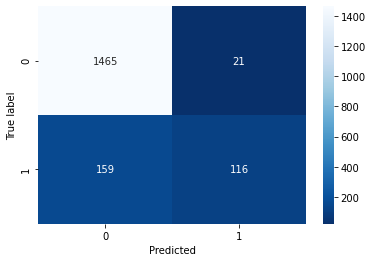

In [64]:
y_test_pred = CB_CV.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

По полученной матрице можно сделать выводы, что у полученной модель довольно высокая точность (Accuracy), что означает, что она хорошо предсказывает в общем случае. Однако полнота (Recall) для класса 1 довольно низкая, что указывает на то, что модель пропускает много объектов класса 1 и предсказывает их как класс 0. Это не очень хорошо с точки зрения бизнеса, но в целом показатели довольно точные в большинстве случаев.

Количество правильных ответов модели значительно преобладает над ошибочными:

* 1471 True Negative 
* 138 True Positive

In [65]:
X_train.columns

Index(['Type', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV',
       'StreamingMovies', 'Partner', 'MultipleLines', 'period'],
      dtype='object')

Узнаем как модель оценила важность всех признаков, на которых была обучена:

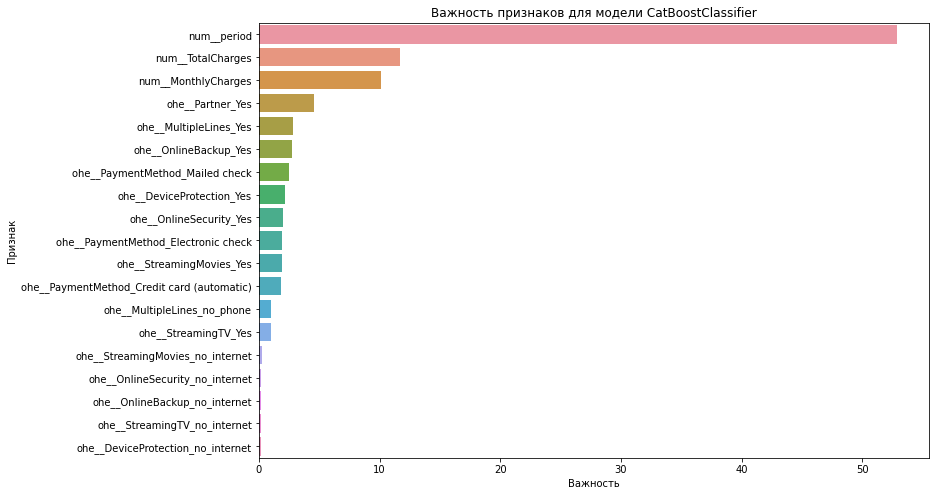

In [75]:
best_model = CB_CV.best_estimator_
model = best_model.named_steps['model']

# Получение важности признаков и их имен
feature_importances = model.get_feature_importance()

# Извлекаем шаги пайплайна с названиями признаков
data_preprocessor = best_model.named_steps['scaler']

# Получаем имена признаков после всех преобразований
transformed_feature_names = data_preprocessor.get_feature_names_out()

# Создание датафрейма для удобного отображения
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Признак': transformed_feature_names,
    'Важность': feature_importances
})

# Сортировка по важности признаков
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importance_df)
plt.title('Важность признаков для модели CatBoostClassifier')
plt.show()

На графике можно наглядно увидеть, что самые важные признаки которые повлияли на предсказание результата это: <br/>
1. Время, которое прошло с даты заключения договора 
2. Общие расходы абонента
3. Размер ежемесячного платежа абонента 
4. Имеется ли партнер у абонента

Эти признаки заметно самые весомые и важные из всех остальных. Веса многих признаков находятся на одном уровне. А некоторые почти совсем не учавствовали в обучении модели, но совсем исключить из датасета их не получится, так как это случаи, когда у абонента не был подключен интернет, а признак отвечал за опцию в интернете. Видимо у таких абонентов полностью отсутствовала корреляция с интернет услугами, так как их интересовала только телефонная связь.


## Итоговый вывод

В полученном датафрейме был произведен первичный осмотр на соответствие содержимого данных действительности и исследовальский анализ данных. <br/>

Работа происходила по такому плану:

* просмотр датасетов с данными
* обработка данных, устранение возможных проблем с данными. Проверка на пропуски и дубликаты
* исследовательский анализ данных
* подготовка данных для дальнейшего использования при обучении моделей(кодирование категориальных значений)
* написание пайплайна для обработки данных и подбора гиперпараметра нескольких моделей
* обучение модели на тренировочных данных
* проверка метрик и доведение работы модели до лучшего результата
* предсказание на тестовой выборке и оценка полученных значений с помощью метрик
* вывод матрицы ошибок для оценки работы модели

В итоговом обучении модели участвовали такие входные признаки, как:

- 'Type' - тип оплаты: раз в год-два или ежемесячно;
- 'PaymentMethod' - тип платежа;
- 'MonthlyCharges' - расходы за месяц;
- 'TotalCharges' - общие расходы абонента;
- 'OnlineSecurity' - блокировка опасных сайтов;
- 'OnlineBackup' - облачное хранилище файлов для резервного копирования данных;
- 'DeviceProtection' - aнтивирус;
- 'StreamingTV' - стриминговое телевидение;
- 'StreamingMovies' - каталог фильмов.
- 'Partner' - есть ли у абонента супруг или супруга;
- 'MultipleLines' - подключение телефона к нескольким линиям одновременно.
- 'period' - сколько прошло со дня заключения договора на пользование

После проверки значений метрики ROC-AUC на тренировочной выборке после обучения разных моделей, лучшая метрика была получена у модели CatBoostClassifier с гиперпараметрами {'model__depth': 4, 'model__learning_rate': 0.03} - 0.89.


В последствии она была использована на предсказании для тестовой выборке, где значение метрики составляло **0.9**. Это удовлетворяла первичному условию ROC-AUC > 0.85. Значит задача решена успешно. <br/><br/>
Также была составлена матрица ошибок на предсказании, и она показала очень хорошие результаты по матрики Accuracy, однако полнота Recall не очень высока. Модель хорошо справляется с определением клиентов которые не собираются уходить, а вот с теми кто возможно может разорвать договор - процент верно пресказанных клиентов меньше. <br/><br/>
**Самые весомые факторы, которые повлияли на результат предсказания модели:**
- Время, которое прошло с даты заключения договора
- Общие расходы абонента
- Размер ежемесячного платежа абонента
- Имеется ли партнер у абонента

Как итог, модель CatBoostClassifier с гиперпараметрами {'model__depth': 4, 'model__learning_rate': 0.03} считаю подходящей для решения данной задачи.